<a href="https://colab.research.google.com/github/Jye0ng/DVCS_test/blob/master/mnist_dropout.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Extracting ./mnist/data/train-images-idx3-ubyte.gz
Extracting ./mnist/data/train-labels-idx1-ubyte.gz
Extracting ./mnist/data/t10k-images-idx3-ubyte.gz
Extracting ./mnist/data/t10k-labels-idx1-ubyte.gz
Epoch: 0001 Avg. cost = 0.426
Epoch: 0002 Avg. cost = 0.166
Epoch: 0003 Avg. cost = 0.114
Epoch: 0004 Avg. cost = 0.090
Epoch: 0005 Avg. cost = 0.071
Epoch: 0006 Avg. cost = 0.061
Epoch: 0007 Avg. cost = 0.052
Epoch: 0008 Avg. cost = 0.046
Epoch: 0009 Avg. cost = 0.041
Epoch: 0010 Avg. cost = 0.036
Epoch: 0011 Avg. cost = 0.033
Epoch: 0012 Avg. cost = 0.032
Epoch: 0013 Avg. cost = 0.028
Epoch: 0014 Avg. cost = 0.027
Epoch: 0015 Avg. cost = 0.025
Epoch: 0016 Avg. cost = 0.027
Epoch: 0017 Avg. cost = 0.022
Epoch: 0018 Avg. cost = 0.022
Epoch: 0019 Avg. cost = 0.023
Epoch: 0020 Avg. cost = 0.021
Epoch: 0021 Avg. cost = 0.019
Epoch: 0022 Avg. cost = 0.020
Epoch: 0023 Avg. cost = 0.019
Epoch: 0024 Avg. cost = 0.018
Epoch: 0025 Avg. cost = 0.018
Epoch: 0026 Avg. cost = 0.015
Epoch: 0027 Avg. c

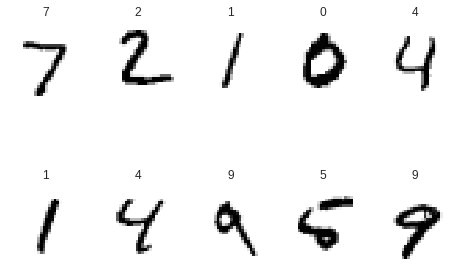

In [4]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("./mnist/data/", one_hot=True)

#########
# 신경망 모델 구성
######
X = tf.placeholder(tf.float32, [None, 784])
Y = tf.placeholder(tf.float32, [None, 10])
keep_prob = tf.placeholder(tf.float32)

W1 = tf.Variable(tf.random_normal([784, 256], stddev=0.01))
L1 = tf.nn.relu(tf.matmul(X, W1))
# 텐서플로우에 내장된 함수를 이용하여 dropout 을 적용합니다.
# 함수에 적용할 레이어와 확률만 넣어주면 됩니다. 겁나 매직!!
L1 = tf.nn.dropout(L1, keep_prob)

W2 = tf.Variable(tf.random_normal([256, 256], stddev=0.01))
L2 = tf.nn.relu(tf.matmul(L1, W2))
L2 = tf.nn.dropout(L2, keep_prob)

W3 = tf.Variable(tf.random_normal([256, 10], stddev=0.01))
model = tf.matmul(L2, W3)

cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=model, labels=Y))
optimizer = tf.train.AdamOptimizer(0.001).minimize(cost)

#########
# 신경망 모델 학습
######
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

batch_size = 100
total_batch = int(mnist.train.num_examples / batch_size)

for epoch in range(30):
    total_cost = 0

    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)

        _, cost_val = sess.run([optimizer, cost],
                               feed_dict={X: batch_xs,
                                          Y: batch_ys,
                                          keep_prob: 0.8})
        total_cost += cost_val

    print('Epoch:', '%04d' % (epoch + 1),
          'Avg. cost =', '{:.3f}'.format(total_cost / total_batch))

print('최적화 완료!')

#########
# 결과 확인
######
is_correct = tf.equal(tf.argmax(model, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))
print('정확도:', sess.run(accuracy,
                        feed_dict={X: mnist.test.images,
                                   Y: mnist.test.labels,
                                   keep_prob: 1}))

#########
# 결과 확인 (matplot)
######
labels = sess.run(model,
                  feed_dict={X: mnist.test.images,
                             Y: mnist.test.labels,
                             keep_prob: 1})

fig = plt.figure()
for i in range(10):
    subplot = fig.add_subplot(2, 5, i + 1)
    subplot.set_xticks([])
    subplot.set_yticks([])
    subplot.set_title('%d' % np.argmax(labels[i]))
    subplot.imshow(mnist.test.images[i].reshape((28, 28)),
                   cmap=plt.cm.gray_r)

plt.show()